# lab 1

Group 7

## Exercise 1

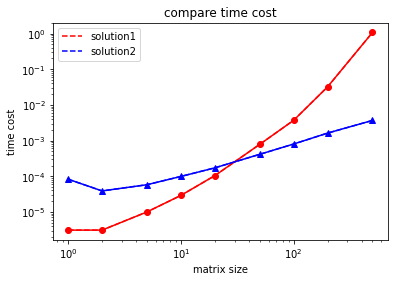

In [1]:
# coding=utf-8
import time
import pandas as pd
from scipy.sparse import lil_matrix
import matplotlib.pyplot as plt


def solution1(n, c, print_log=False):
    r = n - 1
    cnt = 0
    s = ''
    for i in range(n):
        for j in range(n):
            if j == 0 or j == i or j == r - i or j == r:
                s = str(s + c)
                cnt += 1
            else:
                s = str(s + " ")
        s = s + '\n'
    if print_log:
        print(cnt)
        print(s[0:-1])


def solution2(n, c, print_log=False):
    # c = bytes(c.encode())
    # init the right bound
    r = n - 1
    # fill in the matrix
    mat = lil_matrix((n, n) , dtype=str)
    for i in range(n):
        mat[i, 0] = c
        mat[i, i] = c
        mat[i, r] = c
        mat[i, r - i] = c
    # print it
    if print_log:
        print(mat.nnz)
        df = pd.DataFrame(mat.toarray())
        print(df.to_string(index=False, header=False))


def get_time_cost(n, c, solution, if_print=False, i=1):
    if n > 1000:
        return 0
    # print(solution.func_name + " timer start")
    t = time.time()
    for tmp in range(i):
        solution(n, c, if_print)
    return time.time() - t
    # print(solution.func_name + " timer end: " + str(time.time() - t) + '\n')


def plot_time_cost(c1, c2):
    fig, ax = plt.subplots()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.plot(x_axis_range, c1, "r--", label='solution1')
    ax.plot(x_axis_range, c2, "b--", label='solution2')
    plt.plot(x_axis_range, c1, "ro-", x_axis_range, c2, "b^-")
    plt.xlabel('matrix size')
    plt.ylabel('time cost')
    plt.title('compare time cost')
    plt.legend()
    plt.savefig("./output/Week1 Exercise.png")


if __name__ == '__main__':
    # num = 1000
    char = '+'
    interval = 1

    x_axis_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
    cost1 = []
    cost2 = []
    for num in x_axis_range:
        cost1.append(get_time_cost(num, char, solution1))
        cost2.append(get_time_cost(num, char, solution2))

    plot_time_cost(cost1, cost2)


In [2]:
def foo(n, c, print_log=True):
    solution1(n, c, print_log)
    solution2(n, c, print_log)

foo(5, 'o')
foo(7, '*')
foo(9, '=')

15
o   o
oo oo
o o o
oo oo
o   o
15
o       o
o o   o o
o   o   o
o o   o o
o       o
23
*     *
**   **
* * * *
*  *  *
* * * *
**   **
*     *
23
*           *
* *       * *
*   *   *   *
*     *     *
*   *   *   *
* *       * *
*           *
31
=       =
==     ==
= =   = =
=  = =  =
=   =   =
=  = =  =
= =   = =
==     ==
=       =
31
=               =
= =           = =
=   =       =   =
=     =   =     =
=       =       =
=     =   =     =
=   =       =   =
= =           = =
=               =


## Exercise 2

In [3]:
# coding=utf-8
from __future__ import print_function

import time
import pandas as pd
from scipy.sparse import lil_matrix
import matplotlib.pyplot as plt

import math
import sys


class Car:
    def __init__(self, year, mpg, speed):
        self.year = year
        self.mpg = mpg
        self.speed = speed
        self.owners = []

    def accelerate(self):
        self.speed += 30

    def brake(self):
        self.speed -= 60
        if self.speed < 0:
            self.speed = 0

    def __str__(self):
        return "car year {} mpg {} speed {}.".format(self.year, self.mpg, self.speed)


def func():
    car1 = Car(2016, 20, 80)
    print(car1)
    car1.accelerate()
    print(car1)

    car2 = Car(2013, 25, 60)
    print(car2)
    car2.brake()
    print(car2)


if __name__ == '__main__':
    func()


car year 2016 mpg 20 speed 80.
car year 2016 mpg 20 speed 110.
car year 2013 mpg 25 speed 60.
car year 2013 mpg 25 speed 0.
